In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from tqdm import tqdm
from PIL import Image
import io

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB2
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg16 import VGG16
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D, Average, Input, Concatenate, GlobalMaxPooling2D,BatchNormalization
from keras.applications import ResNet50,MobileNet, DenseNet201, InceptionV3, DenseNet121, DenseNet169, InceptionResNetV2, NASNetMobile
from keras.applications.xception import Xception
from keras.models import Model
from keras.optimizers import Adam
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
from IPython.display import display, clear_output
import ipywidgets as widgets

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
labels = ['PNEUMONIA', 'NORMAL']
X_train = []
Y_train  = []
X_test = []
Y_test = []
image_size=224

for label in labels:
    trainPath = os.path.join('/content/drive/MyDrive/pneumonia dataset',label)
    for file in tqdm(os.listdir(trainPath)):
        image = cv2.imread(os.path.join(trainPath, file))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (image_size, image_size))
        X_train.append(image)
        Y_train.append(label)

X_train = np.array(X_train)

100%|██████████| 1583/1583 [02:00<00:00, 13.18it/s]


In [ ]:
X_train, Y_train = shuffle(X_train, Y_train, random_state=1010)

In [ ]:
X_train.shape

(5856, 224, 224, 3)

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=1010)

In [ ]:
IMAGE_SIZE=224
# Model
input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3)
inputs = Input(input_shape)

vgg16 = VGG16(include_top=False, input_shape=input_shape)(inputs)

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
outputs = GlobalAveragePooling2D()(vgg16)
outputs = Dropout(0.4)(outputs)
outputs = BatchNormalization()(outputs)
outputs = Dense(256,activation='relu')(outputs)
outputs = Dense(128,activation='relu')(outputs)
outputs = Dropout(0.2)(outputs)
outputs = Dense(2, activation='softmax')(outputs)

model = Model(inputs, outputs)
model.compile(optimizer=Adam(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Learning Rate Reducer
learn_control = ReduceLROnPlateau(monitor='val_acc', patience=5,
                                  verbose=1,factor=0.2, min_lr=1e-7)

# Checkpoint
filepath="/content/drive/MyDrive/VGG16.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')


In [ ]:
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("LIMEVgg19.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.4, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)

In [ ]:
history = model.fit(X_train,Y_train,validation_split=0.1, epochs =15, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

Epoch 1/15
132/132 [==============================] - ETA: 0s - loss: 0.4067 - accuracy: 0.8066
Epoch 1: val_accuracy improved from -inf to 0.69083, saving model to LIMEVgg19.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


132/132 [==============================] - 108s 605ms/step - loss: 0.4067 - accuracy: 0.8066 - val_loss: 4.6817 - val_accuracy: 0.6908 - lr: 0.0010
Epoch 2/15
132/132 [==============================] - ETA: 0s - loss: 0.2816 - accuracy: 0.8752
Epoch 2: val_accuracy improved from 0.69083 to 0.76759, saving model to LIMEVgg19.h5
132/132 [==============================] - 57s 433ms/step - loss: 0.2816 - accuracy: 0.8752 - val_loss: 2.6302 - val_accuracy: 0.7676 - lr: 0.0010
Epoch 3/15
132/132 [==============================] - ETA: 0s - loss: 0.2176 - accuracy: 0.9117
Epoch 3: val_accuracy did not improve from 0.76759
132/132 [==============================] - 57s 430ms/step - loss: 0.2176 - accuracy: 0.9117 - val_loss: 8.7652 - val_accuracy: 0.7676 - lr: 0.0010
Epoch 4/15
132/132 [==============================] - ETA: 0s - loss: 0.2289 - accuracy: 0.9058
Epoch 4: val_accuracy did not improve from 0.76759

Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0004000000189989805.
132/13

In [ ]:

import numpy as np
import keras
from keras.applications.imagenet_utils import decode_predictions
import skimage.io
import skimage.segmentation
import copy
import sklearn
import sklearn.metrics
from sklearn.linear_model import LinearRegression
import warnings

print('Notebook running: keras ', keras.__version__)
np.random.seed(222)

Notebook running: keras  2.15.0


In [ ]:
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array
#from tensorflow.keras.applications import ResNet50 as res_net
from tensorflow.keras.applications import VGG16 as vgg16_net
from skimage.io import imread
from skimage.transform import resize
import numpy as np
from skimage import io
from skimage.transform import resize
import sklearn.cluster


In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=119ee488372aaab06cf8d475712ead21bbd0e6c8771182dca98631488c534bf3
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
from lime import lime_image
explainer =lime_image.LimeImageExplainer()
from skimage.segmentation import mark_boundaries
from matplotlib import pyplot as plt

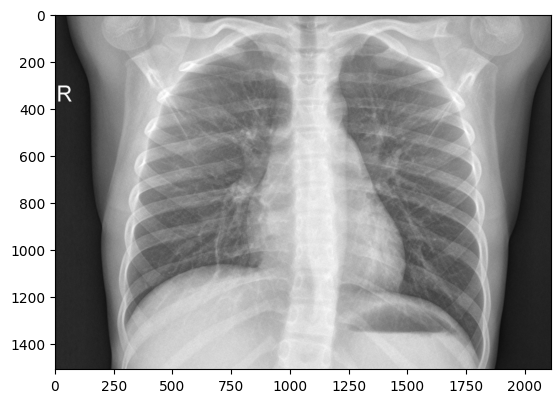

1/1 [==============================] - 0s 27ms/step


In [ ]:
from tensorflow.keras.preprocessing import image
import cv2
image = load_img("/content/drive/MyDrive/pneumonia dataset/NORMAL/IM-0003-0001.jpeg")
def read_and_transform_img(image):
  img = np.array(image)
  img=resize(img,(224,224))
  img=np.expand_dims(img,axis=0)
  plt.imshow(image)
  plt.show()
  return img

images=read_and_transform_img(image)
preds=model.predict(images)
prediction=np.argmax(preds)
pct=np.max(preds)

In [ ]:
explanation = explainer.explain_instance(images[0].astype('double'), #the image
                                         model.predict,
                                         top_labels=2, #want just to see the 2 main classes predicted
                                         num_samples=1000, # number of observation sampled from the original distribution in order to computer the linear regression
                                         hide_color=0)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 22ms/step


(-0.5, 223.5, 223.5, -0.5)

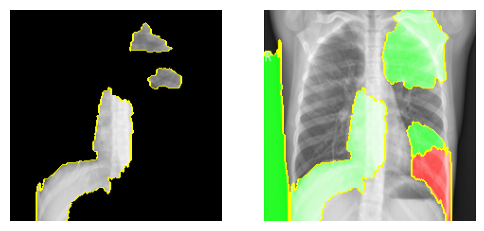

In [ ]:
# maps for the first class predicted
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
# plot image and mask together
fig, (ax1,ax2) =plt.subplots(1,2,figsize=(6,5))
ax1.imshow(mark_boundaries(temp_1,mask_1))
ax2.imshow(mark_boundaries(temp_2,mask_2))
ax1.axis('off')
ax2.axis('off')

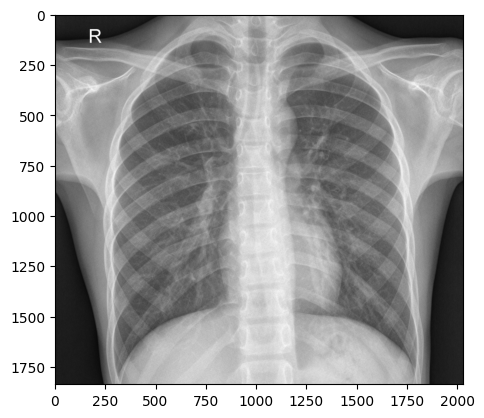

1/1 [==============================] - 0s 89ms/step


In [ ]:
from tensorflow.keras.preprocessing import image
import cv2
image = load_img("/content/drive/MyDrive/pneumonia dataset/NORMAL/IM-0005-0001.jpeg")
def read_and_transform_img(image):
  img = np.array(image)
  img=resize(img,(224,224))
  img=np.expand_dims(img,axis=0)
  plt.imshow(image)
  plt.show()
  return img

images=read_and_transform_img(image)
preds=model.predict(images)
prediction=np.argmax(preds)
pct=np.max(preds)

In [ ]:
explanation = explainer.explain_instance(images[0].astype('double'), #the image
                                         model.predict,
                                         top_labels=2, #want just to see the 2 main classes predicted
                                         num_samples=1000, # number of observation sampled from the original distribution in order to computer the linear regression
                                         hide_color=0)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 23ms/step


(-0.5, 223.5, 223.5, -0.5)

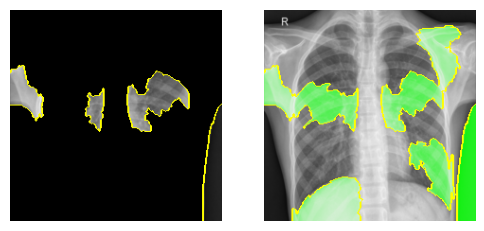

In [ ]:
# maps for the first class predicted
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
# plot image and mask together
fig, (ax1,ax2) =plt.subplots(1,2,figsize=(6,5))
ax1.imshow(mark_boundaries(temp_1,mask_1))
ax2.imshow(mark_boundaries(temp_2,mask_2))
ax1.axis('off')
ax2.axis('off')

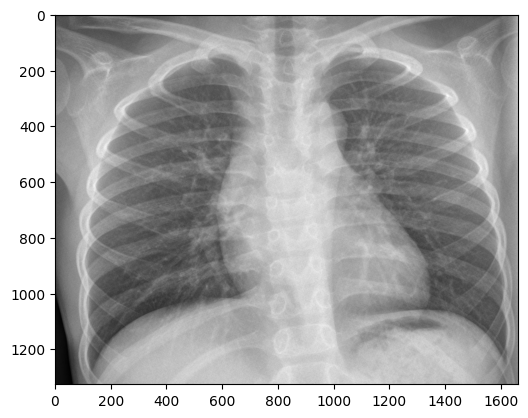

1/1 [==============================] - 0s 18ms/step


In [ ]:
from tensorflow.keras.preprocessing import image
import cv2
image = load_img("/content/drive/MyDrive/pneumonia dataset/NORMAL/IM-0006-0001.jpeg")
def read_and_transform_img(image):
  img = np.array(image)
  img=resize(img,(224,224))
  img=np.expand_dims(img,axis=0)
  plt.imshow(image)
  plt.show()
  return img

images=read_and_transform_img(image)
preds=model.predict(images)
prediction=np.argmax(preds)
pct=np.max(preds)

In [ ]:
explanation = explainer.explain_instance(images[0].astype('double'), #the image
                                         model.predict,
                                         top_labels=2, #want just to see the 2 main classes predicted
                                         num_samples=1000, # number of observation sampled from the original distribution in order to computer the linear regression
                                         hide_color=0)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 44ms/step


(-0.5, 223.5, 223.5, -0.5)

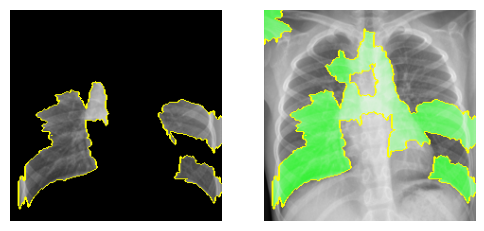

In [ ]:
# maps for the first class predicted
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
# plot image and mask together
fig, (ax1,ax2) =plt.subplots(1,2,figsize=(6,5))
ax1.imshow(mark_boundaries(temp_1,mask_1))
ax2.imshow(mark_boundaries(temp_2,mask_2))
ax1.axis('off')
ax2.axis('off')

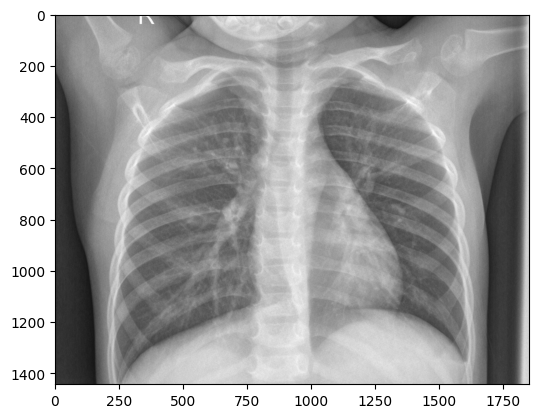

1/1 [==============================] - 0s 30ms/step


In [ ]:
from tensorflow.keras.preprocessing import image
import cv2
image = load_img("/content/drive/MyDrive/pneumonia dataset/NORMAL/IM-0009-0001.jpeg")
def read_and_transform_img(image):
  img = np.array(image)
  img=resize(img,(224,224))
  img=np.expand_dims(img,axis=0)
  plt.imshow(image)
  plt.show()
  return img

images=read_and_transform_img(image)
preds=model.predict(images)
prediction=np.argmax(preds)
pct=np.max(preds)

In [ ]:
explanation = explainer.explain_instance(images[0].astype('double'), #the image
                                         model.predict,
                                         top_labels=2, #want just to see the 2 main classes predicted
                                         num_samples=1000, # number of observation sampled from the original distribution in order to computer the linear regression
                                         hide_color=0)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 21ms/step


(-0.5, 223.5, 223.5, -0.5)

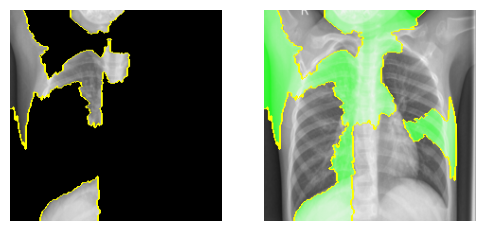

In [ ]:
# maps for the first class predicted
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
# plot image and mask together
fig, (ax1,ax2) =plt.subplots(1,2,figsize=(6,5))
ax1.imshow(mark_boundaries(temp_1,mask_1))
ax2.imshow(mark_boundaries(temp_2,mask_2))
ax1.axis('off')
ax2.axis('off')

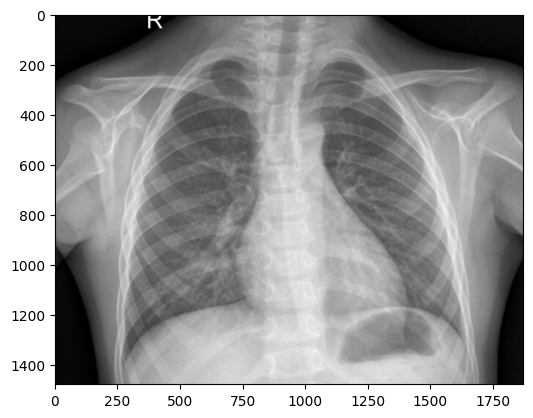

1/1 [==============================] - 0s 30ms/step


In [ ]:
from tensorflow.keras.preprocessing import image
import cv2
image = load_img("/content/drive/MyDrive/pneumonia dataset/NORMAL/IM-0010-0001.jpeg")
def read_and_transform_img(image):
  img = np.array(image)
  img=resize(img,(224,224))
  img=np.expand_dims(img,axis=0)
  plt.imshow(image)
  plt.show()
  return img

images=read_and_transform_img(image)
preds=model.predict(images)
prediction=np.argmax(preds)
pct=np.max(preds)

In [ ]:
explanation = explainer.explain_instance(images[0].astype('double'), #the image
                                         model.predict,
                                         top_labels=2, #want just to see the 2 main classes predicted
                                         num_samples=1000, # number of observation sampled from the original distribution in order to computer the linear regression
                                         hide_color=0)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 22ms/step


(-0.5, 223.5, 223.5, -0.5)

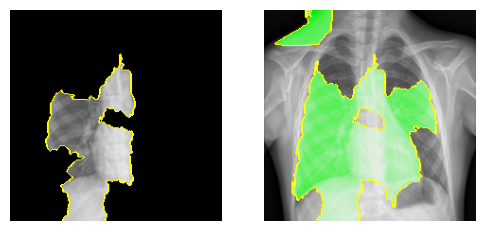

In [ ]:
# maps for the first class predicted
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
# plot image and mask together
fig, (ax1,ax2) =plt.subplots(1,2,figsize=(6,5))
ax1.imshow(mark_boundaries(temp_1,mask_1))
ax2.imshow(mark_boundaries(temp_2,mask_2))
ax1.axis('off')
ax2.axis('off')

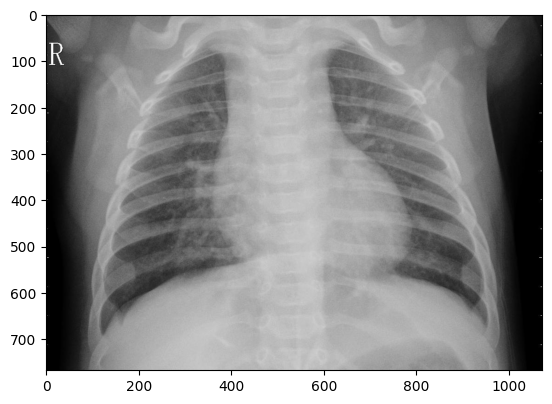

1/1 [==============================] - 0s 18ms/step


In [ ]:
from tensorflow.keras.preprocessing import image
import cv2
image = load_img("/content/drive/MyDrive/pneumonia dataset/PNEUMONIA/person1000_virus_1681.jpeg")
def read_and_transform_img(image):
  img = np.array(image)
  img=resize(img,(224,224))
  img=np.expand_dims(img,axis=0)
  plt.imshow(image)
  plt.show()
  return img

images=read_and_transform_img(image)
preds=model.predict(images)
prediction=np.argmax(preds)
pct=np.max(preds)

In [ ]:
explanation = explainer.explain_instance(images[0].astype('double'), #the image
                                         model.predict,
                                         top_labels=2, #want just to see the 2 main classes predicted
                                         num_samples=1000, # number of observation sampled from the original distribution in order to computer the linear regression
                                         hide_color=0)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 21ms/step


(-0.5, 223.5, 223.5, -0.5)

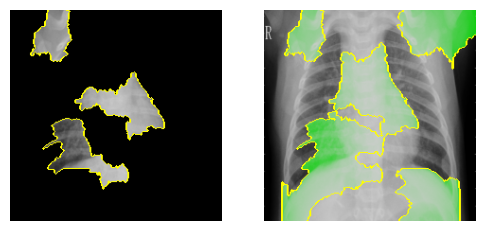

In [ ]:
# maps for the first class predicted
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
# plot image and mask together
fig, (ax1,ax2) =plt.subplots(1,2,figsize=(6,5))
ax1.imshow(mark_boundaries(temp_1,mask_1))
ax2.imshow(mark_boundaries(temp_2,mask_2))
ax1.axis('off')
ax2.axis('off')

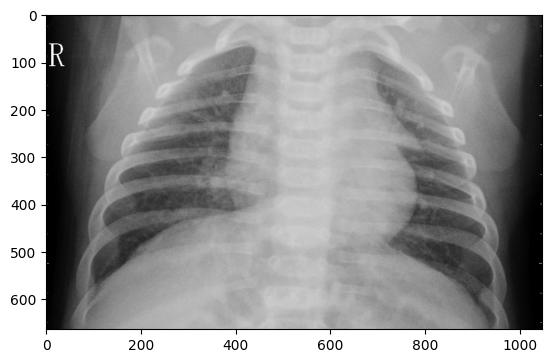

1/1 [==============================] - 0s 121ms/step


In [ ]:
from tensorflow.keras.preprocessing import image
import cv2
image = load_img("/content/drive/MyDrive/pneumonia dataset/PNEUMONIA/person1007_virus_1690.jpeg")
def read_and_transform_img(image):
  img = np.array(image)
  img=resize(img,(224,224))
  img=np.expand_dims(img,axis=0)
  plt.imshow(image)
  plt.show()
  return img

images=read_and_transform_img(image)
preds=model.predict(images)
prediction=np.argmax(preds)
pct=np.max(preds)

In [ ]:
explanation = explainer.explain_instance(images[0].astype('double'), #the image
                                         model.predict,
                                         top_labels=2, #want just to see the 2 main classes predicted
                                         num_samples=1000, # number of observation sampled from the original distribution in order to computer the linear regression
                                         hide_color=0)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 21ms/step


(-0.5, 223.5, 223.5, -0.5)

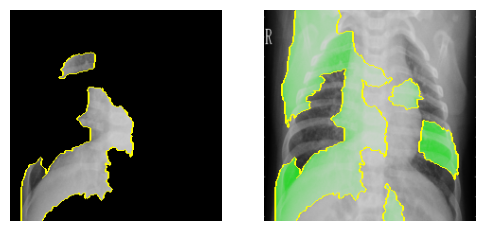

In [ ]:
# maps for the first class predicted
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
# plot image and mask together
fig, (ax1,ax2) =plt.subplots(1,2,figsize=(6,5))
ax1.imshow(mark_boundaries(temp_1,mask_1))
ax2.imshow(mark_boundaries(temp_2,mask_2))
ax1.axis('off')
ax2.axis('off')

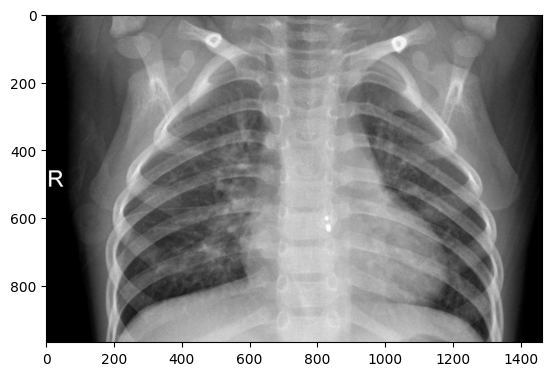

1/1 [==============================] - 0s 31ms/step


In [ ]:
from tensorflow.keras.preprocessing import image
import cv2
image = load_img("/content/drive/MyDrive/pneumonia dataset/PNEUMONIA/person1049_bacteria_2983.jpeg")
def read_and_transform_img(image):
  img = np.array(image)
  img=resize(img,(224,224))
  img=np.expand_dims(img,axis=0)
  plt.imshow(image)
  plt.show()
  return img

images=read_and_transform_img(image)
preds=model.predict(images)
prediction=np.argmax(preds)
pct=np.max(preds)

In [ ]:
explanation = explainer.explain_instance(images[0].astype('double'), #the image
                                         model.predict,
                                         top_labels=2, #want just to see the 2 main classes predicted
                                         num_samples=1000, # number of observation sampled from the original distribution in order to computer the linear regression
                                         hide_color=0)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 20ms/step


(-0.5, 223.5, 223.5, -0.5)

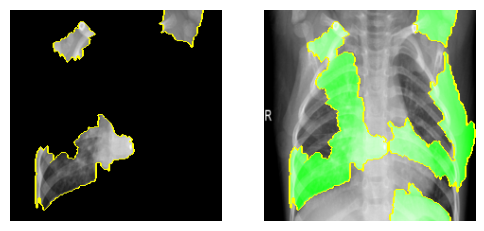

In [ ]:
# maps for the first class predicted
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
# plot image and mask together
fig, (ax1,ax2) =plt.subplots(1,2,figsize=(6,5))
ax1.imshow(mark_boundaries(temp_1,mask_1))
ax2.imshow(mark_boundaries(temp_2,mask_2))
ax1.axis('off')
ax2.axis('off')

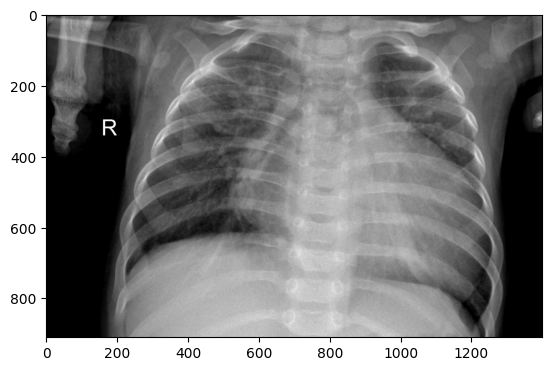

1/1 [==============================] - 0s 139ms/step


In [ ]:
from tensorflow.keras.preprocessing import image
import cv2
image = load_img("/content/drive/MyDrive/pneumonia dataset/PNEUMONIA/person1057_bacteria_2991.jpeg")
def read_and_transform_img(image):
  img = np.array(image)
  img=resize(img,(224,224))
  img=np.expand_dims(img,axis=0)
  plt.imshow(image)
  plt.show()
  return img

images=read_and_transform_img(image)
preds=model.predict(images)
prediction=np.argmax(preds)
pct=np.max(preds)

In [ ]:
explanation = explainer.explain_instance(images[0].astype('double'), #the image
                                         model.predict,
                                         top_labels=2, #want just to see the 2 main classes predicted
                                         num_samples=1000, # number of observation sampled from the original distribution in order to computer the linear regression
                                         hide_color=0)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 20ms/step


(-0.5, 223.5, 223.5, -0.5)

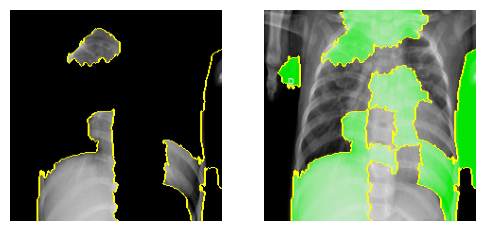

In [ ]:
# maps for the first class predicted
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
# plot image and mask together
fig, (ax1,ax2) =plt.subplots(1,2,figsize=(6,5))
ax1.imshow(mark_boundaries(temp_1,mask_1))
ax2.imshow(mark_boundaries(temp_2,mask_2))
ax1.axis('off')
ax2.axis('off')

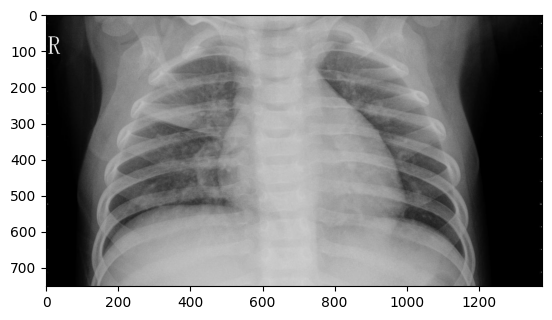

1/1 [==============================] - 0s 127ms/step


In [ ]:
from tensorflow.keras.preprocessing import image
import cv2
image = load_img("/content/drive/MyDrive/pneumonia dataset/PNEUMONIA/person1070_virus_1773.jpeg")
def read_and_transform_img(image):
  img = np.array(image)
  img=resize(img,(224,224))
  img=np.expand_dims(img,axis=0)
  plt.imshow(image)
  plt.show()
  return img

images=read_and_transform_img(image)
preds=model.predict(images)
prediction=np.argmax(preds)
pct=np.max(preds)

In [ ]:
explanation = explainer.explain_instance(images[0].astype('double'), #the image
                                         model.predict,
                                         top_labels=2, #want just to see the 2 main classes predicted
                                         num_samples=1000, # number of observation sampled from the original distribution in order to computer the linear regression
                                         hide_color=0)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 22ms/step


(-0.5, 223.5, 223.5, -0.5)

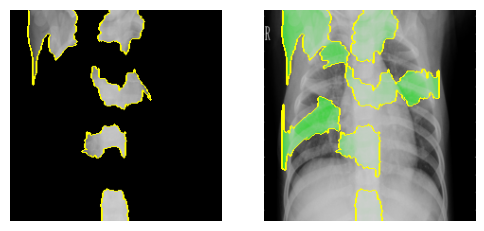

In [ ]:
# maps for the first class predicted
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
# plot image and mask together
fig, (ax1,ax2) =plt.subplots(1,2,figsize=(6,5))
ax1.imshow(mark_boundaries(temp_1,mask_1))
ax2.imshow(mark_boundaries(temp_2,mask_2))
ax1.axis('off')
ax2.axis('off')